# Data Analysis

## Data Visualization

In [1]:
## Import packages
import pandas as pd
from pandas import set_option
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np
from scipy import stats

from sklearn.model_selection import train_test_split, KFold, cross_val_score   
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import classification_report as cls_report
from sklearn.metrics import f1_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.ensemble import RandomForestClassifier    #Random Forest
from sklearn.neural_network import MLPClassifier       #Neural Network
from sklearn.svm import SVC                            #Support Vector Machine 

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from matplotlib import rcParams
rcParams['xtick.major.pad'] = 1
rcParams['ytick.major.pad'] = 1

In [2]:
bc=pd.read_csv('C:\Digits\data.csv')
bc

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
bc['diagnosis']=bc['diagnosis'].map({'M':1,'B':0})
bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# check for null values in dataset
bc.isnull().values.any()

True

In [5]:
# Count class labels
bc['diagnosis'].value_counts()


0    357
1    212
Name: diagnosis, dtype: int64

In [6]:
bc.drop(['id','Unnamed: 32'], axis = 1, inplace = True) ## dropped the id and unnamed column
bc

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
# Data visualization to create histogram
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [9]:
bc.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
bc.groupby('diagnosis').mean()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [7]:
# Separate labels and features
X = bc.iloc[:, 1:31]
Y = bc.iloc[:,0]
X.shape


(569, 30)

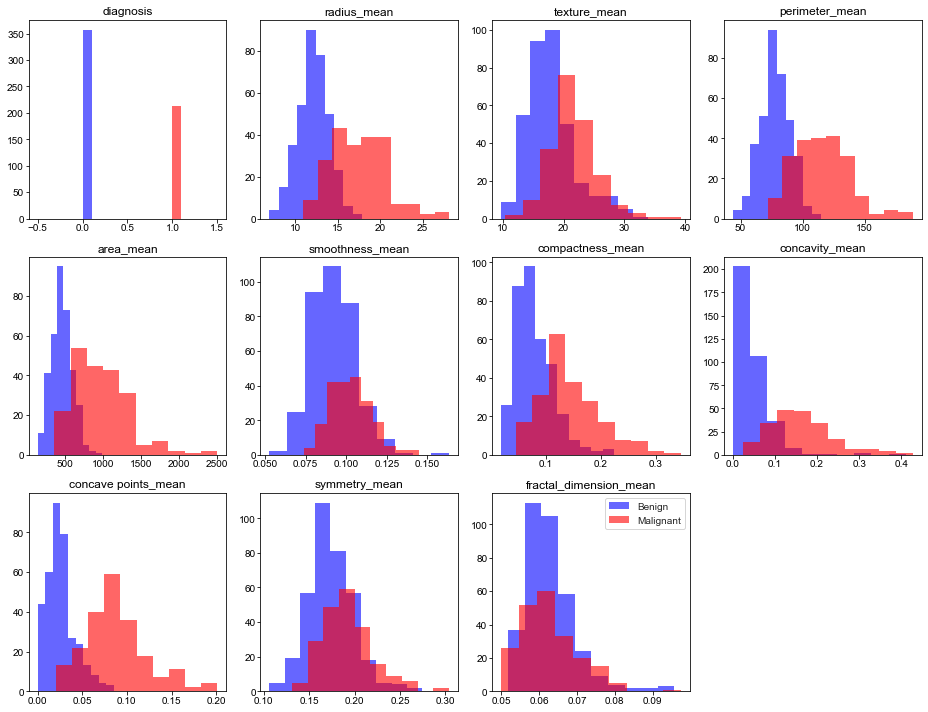

In [12]:
# Visualize tumor characteristics for positive and negatives diagnoses 

bc_n = bc[bc['diagnosis'] == 0]
bc_y = bc[bc['diagnosis'] == 1]

# Instantiate figure object
fig = plt.figure()
#plt.sup_title('Tumor Characteristic (means)')

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(bc.columns[0:11])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.hist(bc_n[b], label = 'Benign', stacked = True, alpha=0.6, color= 'b')
    ax.hist(bc_y[b], label= 'Malignant', stacked = True, alpha=0.6, color= 'r')
    
    ax.set_title(b)
fig.set_size_inches(13, 10)
sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()

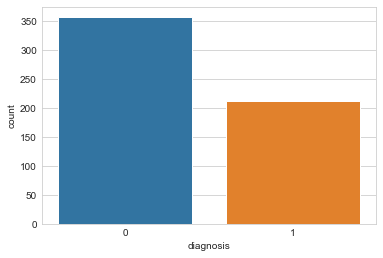

In [13]:
sns.countplot(bc['diagnosis'],label="Count")

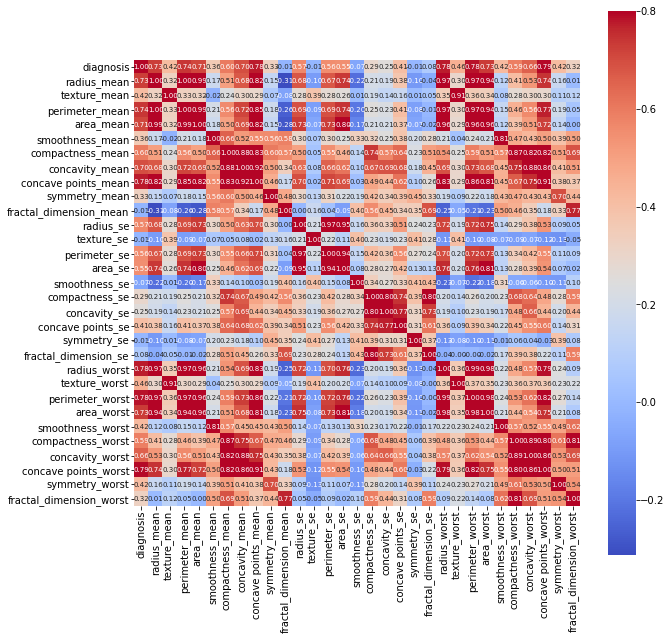

In [8]:
# Print correlation matrix
matrix = bc.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix, vmax=.8, square=True,annot=True, fmt= '.2f', cbar=True, annot_kws={'size': 7}, cmap="coolwarm");

In [9]:
less_corr = bc.corr().diagnosis[bc.corr().diagnosis<=0.2].index
print (less_corr)

Index(['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')


In [10]:
bc.shape

(569, 31)

In [11]:
bc = bc.drop(less_corr,axis=1)

In [12]:
bc.shape

(569, 26)

In [13]:
bc.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Data Preprocessing

In [14]:
# Separate labels and features
X = bc.iloc[:, 1:31]
Y = bc.iloc[:,0]
X.shape

(569, 25)

In [15]:
#Split the available data into 80%  training set and 20% testing set. 
#Train the algorithm on the first part, make predictions on the second part and
#evaluate the predictions against the expected results.

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = .8, random_state = 0)



In [16]:
#Feature Scaling using standscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

# Model Testing:
We are including 4 types of models:
Parametric models: SVM
Non-Parametric models: KNN
Linear models: Logistic Regression
Non-Linear models: Random Forest Classifier

### Logistic Regression

In [24]:
## logistic regression implementation

# Define parameters for optimization of Logistic Regression
LR_para = {'C':[0.001, 0.1, 1, 10, 100],'max_iter':[1000000]}
LR_opt=[]
LR_opt.append((LogisticRegression(), LR_para))

#Function to check the accuracy of the model using dictionaries
def check(parameter_dictionary, scoring = 'accuracy'):    
    for model, para in LR_opt:    
        kfold = KFold(len(X_train_norm), random_state=0, shuffle=True)
        model_grid = GridSearchCV(model, para)
        model_grid.fit(X_train_norm,Y_train)
        cv_result = cross_val_score(model_grid, X_train_norm, Y_train, cv = kfold, scoring=scoring)
        print ("Cross Validation Accuracy For LR :- Accuracy: %f SD: %f" % (cv_result.mean(), cv_result.std()))
        print ("Best parameters for Logistic regression :", model_grid.best_params_)       
    return(cv_result)
        


In [25]:
from sklearn.model_selection import GridSearchCV
result= check (LR_opt,scoring='accuracy')

Cross Validation Accuracy For LR :- Accuracy: 0.982418 SD: 0.131428
Best parameters for Logistic regression : {'C': 1, 'max_iter': 1000000}


In [26]:
LR = LogisticRegression(C=1, max_iter=1000000)
LR.fit(X_train_norm, Y_train)
y_pred_LR = LR.predict(X_test_norm)
#Model Evaluation
LRacc = accuracy_score(Y_test, y_pred_LR)
# The confusion matrix  result which is telling us correct predictions and incorrect predictions.
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_pred_LR)
print(confusion_matrix)


[[66  1]
 [ 2 45]]


In [27]:
print('Classification Report: \n' + str(cls_report(Y_test, y_pred_LR)))

Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



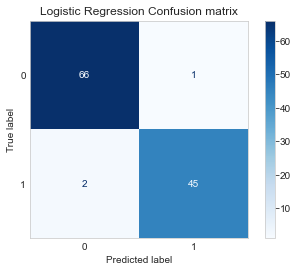

In [28]:
from sklearn.metrics import plot_confusion_matrix
labels=['benign','malignant']
disp = plot_confusion_matrix(LR, X_test_norm, Y_test,cmap=plt.cm.Blues)
disp.ax_.set_title("Logistic Regression Confusion matrix")
plt.grid(None) 
plt.show()

### KNN Classification

In [30]:
# build KNN model and choose n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors = 4)
# train the model
knn.fit(X_train_norm, Y_train)
# get the predict value from X_test
y_pred_knn = knn.predict(X_test_norm)
# print the score
print('accuracy: ', knn.score(X_test_norm, Y_test))


accuracy:  0.9473684210526315


Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

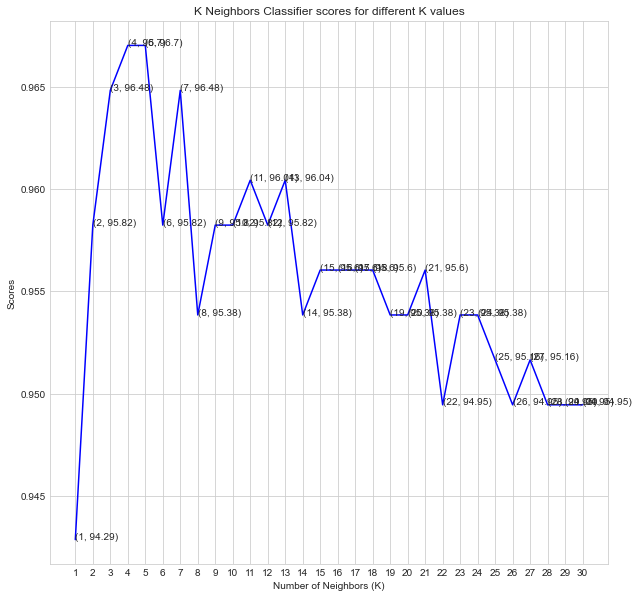

In [31]:
# use the same model as before with cross validation

%matplotlib inline
# choose k between 1 to 31
k_range = range(1, 31)
k_scores = []
# use iteration to calculate different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski', p = 2)
    scores = cross_val_score(knn, X_train_norm, Y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

plt.figure(figsize=(10,10))
plt.plot([k for k in k_range], k_scores, color = 'blue')
for i in range(1,31):
    plt.text(i, k_scores[i-1], (i, round(k_scores[i-1]*100,2)))
plt.xticks([i for i in range(1, 31)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')


In [32]:
print('Accuracy score on Train data: {}'.format(k_scores[4]*100))

Accuracy score on Train data: 96.70329670329669


In [33]:
# Test model with K = 14
knn = KNeighborsClassifier(n_neighbors = 4,metric = 'minkowski', p = 2)
scores = cross_val_score(knn, X_test_norm, Y_test, cv=5, scoring='accuracy')
print(scores.mean()*100)

   

92.96442687747034


In [34]:
# Define parameters for optimization of KNN
KNN_params = {'n_neighbors':[1,5,10,20,30,50], 'p':[2], 'metric':['minkowski']}
KNN_opt=[]
KNN_opt.append((KNeighborsClassifier(), KNN_params))

#Function to check the accuracy of the model using dictionaries
def check(parameter_dictionary, scoring = 'accuracy'):    
    for model, para in KNN_opt:    
        kfold = KFold(len(X_train_norm), random_state=42, shuffle=True)
        model_grid = GridSearchCV(model, para)
        model_grid.fit(X_train_norm,Y_train)
        cv_result = cross_val_score(model_grid, X_train_norm, Y_train, cv = kfold, scoring=scoring)
        print("Best parameters for KNN", model_grid.best_params_)
        ans = "Cross Validation Accuracy For KNN :- Accuracy: %f SD: %f" % (cv_result.mean(), cv_result.std())
        print(ans)
    return(cv_result)
 


In [35]:
from sklearn.model_selection import GridSearchCV
result= check(KNN_opt,scoring='accuracy')


Best parameters for KNN {'metric': 'minkowski', 'n_neighbors': 5, 'p': 2}
Cross Validation Accuracy For KNN :- Accuracy: 0.969231 SD: 0.172692


In [36]:
knn = KNeighborsClassifier(metric= 'minkowski', n_neighbors= 5, p=2)
# train the model
knn.fit(X_test_norm, Y_test)
# get the predict value from X_test
y_pred_knn1 = knn.predict(X_test_norm)
# print the score
print('accuracy: ', knn.score(X_test_norm, Y_test))

accuracy:  0.9649122807017544


In [37]:
print('Classification Report: \n' + str(cls_report(Y_test, y_pred_knn1)))
# The confusion matrix  result which is telling us correct predictions and incorrect predictions.
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_pred_knn1)
print(confusion_matrix)

Classification Report: 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        67
           1       1.00      0.91      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

[[67  0]
 [ 4 43]]


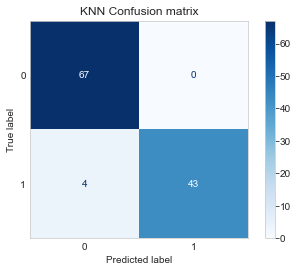

In [38]:
from sklearn.metrics import plot_confusion_matrix
labels=['benign','malignant']
disp = plot_confusion_matrix(knn, X_test_norm, Y_test,cmap=plt.cm.Blues)
disp.ax_.set_title("KNN Confusion matrix")
plt.grid(None) 
plt.show()


### Random Forest Classification

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

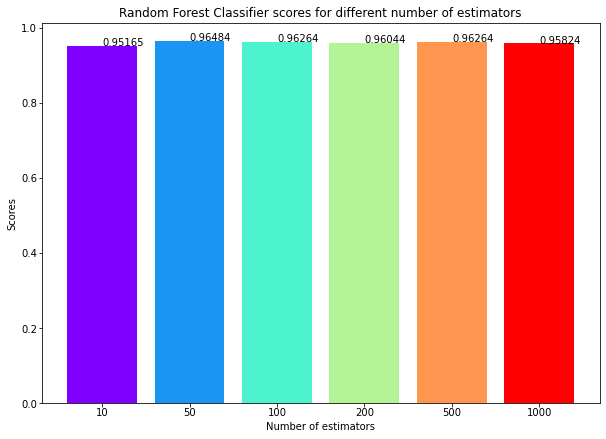

In [23]:
from matplotlib.cm import rainbow
rf_scores = []
estimators = [10,50,100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, criterion = 'entropy', random_state = 42)
    rf_scores.append(cross_val_score(rf_classifier, X_train_norm, Y_train, cv=5, scoring='accuracy').mean())

plt.figure(figsize=(10,7))
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], round(rf_scores[i],5))
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')



In [24]:
print('Accuracy score on Train data: {}'.format(rf_scores[1]*100))

Accuracy score on Train data: 96.4835164835165


Accuracy score on Test data: 94.73684210526315
              precision    recall  f1-score   support

      benign       0.96      0.96      0.96        67
   malignant       0.94      0.94      0.94        47

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



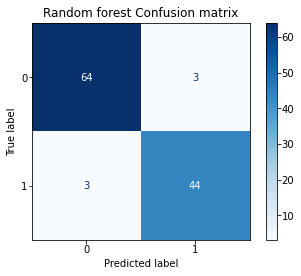

In [26]:
from sklearn import metrics
rf_classifier = RandomForestClassifier(n_estimators = 50, random_state = 42)
rf_classifier.fit(X_train_norm, Y_train)
y_pred = rf_classifier.predict(X_test_norm)
print('Accuracy score on Test data: {}'.format(metrics.accuracy_score(Y_test,y_pred)*100))
from sklearn.metrics import classification_report
target_names = ['benign', 'malignant']
print(classification_report(Y_test, y_pred, target_names=target_names))
from sklearn.metrics import plot_confusion_matrix
labels=['benign','malignant']
disp = plot_confusion_matrix(rf_classifier, X_test_norm, Y_test,cmap=plt.cm.Blues)
disp.ax_.set_title("Random forest Confusion matrix")
#plt.grid(None) 
plt.show()

In [20]:
from sklearn.model_selection import GridSearchCV
RF_params = {'n_estimators':[10,50,100, 200]}
RFC_2 = RandomForestClassifier(random_state=42)

# Instantiate gridsearch using RFC model and dictated parameters
RFC_2_grid = GridSearchCV(RFC_2, RF_params)

# Fit model to training data
RFC_2_grid.fit(X_train_norm, Y_train)

# Print best parameters
print('Optimized number of estimators: {}'.format(RFC_2_grid.best_params_.values()))

Optimized number of estimators: dict_values([200])


In [21]:
forest = RandomForestClassifier(n_estimators=200, criterion = 'entropy', random_state=42)
forest.fit(X_train_norm,Y_train)
y_pred_random = forest.predict(X_test_norm)
confusionmatrix_random = confusion_matrix(Y_test, y_pred_random)
print('Confusion Matrix for Support Vector Machine Model')
print(confusionmatrix_random)
print('accuracy on train dataset sc: {:.3f}'.format(forest.score(X_train_norm,Y_train)))
print(accuracy_score(Y_test, y_pred_random))

Confusion Matrix for Support Vector Machine Model
[[66  1]
 [ 2 45]]
accuracy on train dataset sc: 1.000
0.9736842105263158


### Decision Tree Classification

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

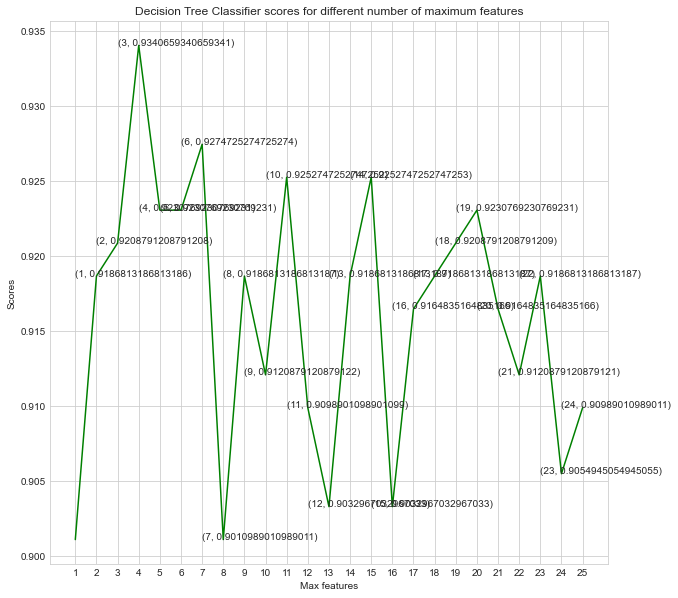

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_scores.append(cross_val_score(dt_classifier, X_train, Y_train, cv=5, scoring='accuracy').mean())


plt.figure(figsize=(10,10))
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
#for i in range(1, len(X.columns)+1):
for i in range(1, len(X.columns)):
   # plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
   plt.text(i, dt_scores[i], (i, dt_scores[i]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [44]:
print('Accuracy score on Train data: {}'.format(dt_scores[3]*100))

Accuracy score on Train data: 93.4065934065934


In [45]:
dt_classifier = DecisionTreeClassifier(max_features = 3, random_state = 0)
dt_classifier.fit(X_train_norm, Y_train)
y_pred = dt_classifier.predict(X_test_norm)
print('Accuracy  score on Test data: {}'.format(metrics.accuracy_score(Y_test,y_pred)*100))

Accuracy  score on Test data: 92.10526315789474


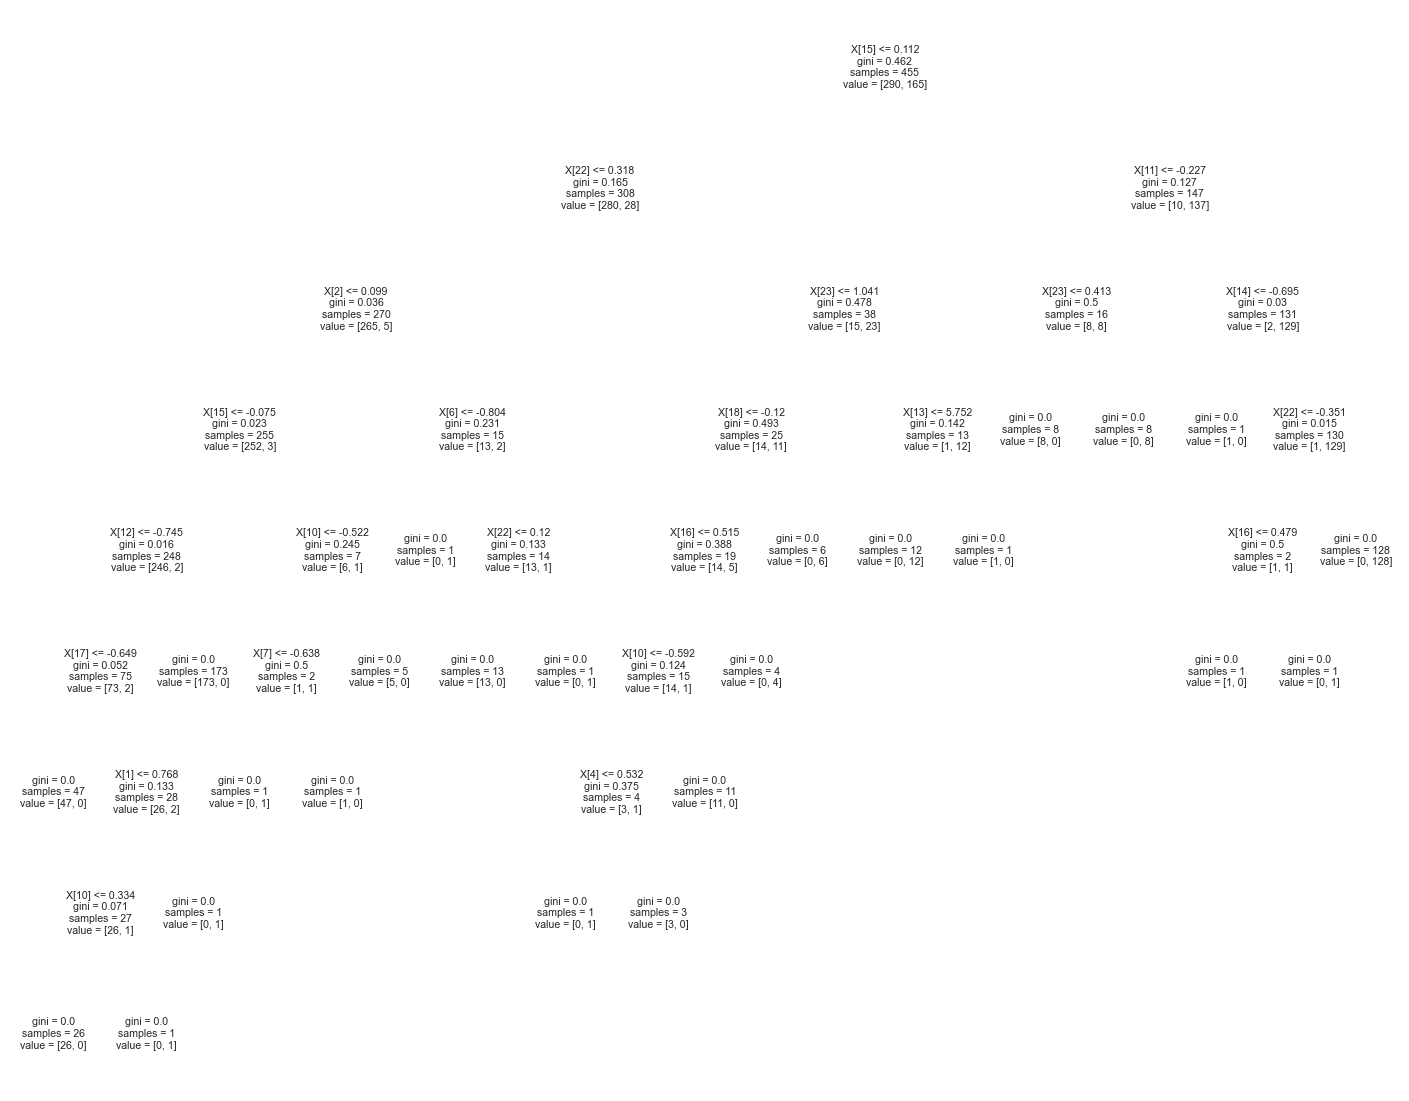

In [46]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_classifier)

### Support Vector Machine

accuracy on train dataset: 0.985
accuracy on test dataset: 0.965
Accuracy score on Train data: 97.58241758241759


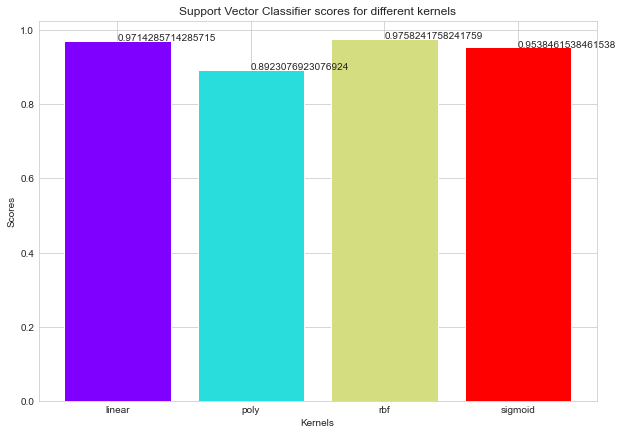

In [61]:
svm= SVC()
svm.fit(X_train_norm, Y_train)

print('accuracy on train dataset: {:.3f}'.format(svm.score(X_train_norm,Y_train)))
print('accuracy on test dataset: {:.3f}'.format(svm.score(X_test_norm,Y_test)))


svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_scores.append(cross_val_score(svc_classifier, X_train_norm, Y_train, cv=5, scoring='accuracy').mean())


from matplotlib.cm import rainbow
import numpy as np
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.figure(figsize=(10,7))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

print('Accuracy score on Train data: {}'.format(svc_scores[2]*100))

In [62]:
print('Accuracy score on Train data: {}'.format(svc_scores[2]*100))

Accuracy score on Train data: 97.58241758241759


Accuracy score on Test data: 96.49122807017544
              precision    recall  f1-score   support

      benign       0.97      0.97      0.97        67
   malignant       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



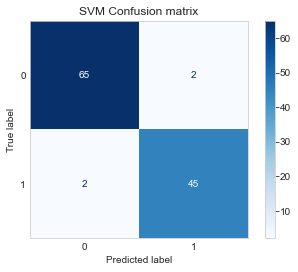

In [66]:
from sklearn import metrics
svm_classifier = SVC(kernel = 'rbf')
svm_classifier.fit(X_train_norm, Y_train)
y_pred = svm_classifier.predict(X_test_norm)
print('Accuracy score on Test data: {}'.format(metrics.accuracy_score(Y_test,y_pred)*100))
from sklearn.metrics import classification_report
target_names = ['benign', 'malignant']
print(classification_report(Y_test, y_pred, target_names=target_names))
from sklearn.metrics import plot_confusion_matrix
labels=['benign','malignant']
disp = plot_confusion_matrix(svm_classifier, X_test_norm, Y_test,cmap=plt.cm.Blues)
disp.ax_.set_title("SVM Confusion matrix")
plt.grid(None) 
plt.show()